In [180]:
import numpy as np
import matplotlib.pyplot as plt

In [181]:
class Env:
    def reset(self):
        self.state = np.random.randint(7)
        return self.state
    
    def set_state(self, state):
        self.state = state
    
    def step(self, action):
        if action == 0:   # solid action
            self.state = 6
        else:  # dashed action
            self.state = np.random.randint(6)
        
        return self.state, 0

In [182]:
class Agent1:  # semi-gradient off-policy TD

    # target policy: always solid action
    # behavior policy: solid action with 1/7, dashed action with 6/7

    def __init__(self, do=False):
        self.x = np.array([[2., 0, 0, 0, 0, 0, 0, 1],
                           [0, 2, 0, 0, 0, 0, 0, 1],
                           [0, 0, 2, 0, 0, 0, 0, 1],
                           [0, 0, 0, 2, 0, 0, 0, 1],
                           [0, 0, 0, 0, 2, 0, 0, 1],
                           [0, 0, 0, 0, 0, 2, 0, 1],
                           [0, 0, 0, 0, 0, 0, 1, 2]])
        self.w = np.array([1., 1, 1, 1, 1, 1, 10, 5]).T

        self.alpha = 0.01
        self.gamma = 0.99

        if do:
            self.do()

    def do(self):
        self.s_log = []
        self.w_log = []
        env = Env()
        state = env.reset()
        for step in range(1000):
            action = np.random.choice(2, p=[1/7, 6/7])
            next_state, reward = env.step(action)

            if action == 0:
                rho = 7
            else:
                rho = 0

            delta = reward + self.gamma * self.w @ self.x[next_state] - self.w @ self.x[state]

            self.w += self.alpha * rho * delta * self.x[state]

            self.s_log.append(np.dot(self.x, self.w))
            self.w_log.append(self.w.copy())
            state = next_state

In [183]:
class Agent2:  # Dynamic Programming

    # target policy: always solid action
    # behavior policy: solid action with 1/7, dashed action with 6/7

    def __init__(self, do=False):
        self.x = np.array([[2., 0, 0, 0, 0, 0, 0, 1],
                           [0, 2, 0, 0, 0, 0, 0, 1],
                           [0, 0, 2, 0, 0, 0, 0, 1],
                           [0, 0, 0, 2, 0, 0, 0, 1],
                           [0, 0, 0, 0, 2, 0, 0, 1],
                           [0, 0, 0, 0, 0, 2, 0, 1],
                           [0, 0, 0, 0, 0, 0, 1, 2]])
        self.w = np.array([1., 1, 1, 1, 1, 1, 10, 1]).T
        self.alpha = 0.01
        self.gamma = 0.99

        if do:
            self.do()

    def do(self):
        self.s_log = []
        self.w_log = []
        for iter in range(1000):
            w_delta = np.zeros(8)

            for state in range(7):
                delta = 0 + self.gamma * self.w @ self.x[6] - self.w @ self.x[state]
                w_delta += delta * self.x[state]

            self.w += self.alpha / 7 * w_delta 

            self.s_log.append(np.dot(self.x, self.w))
            self.w_log.append(self.w.copy())

In [184]:
a1 = Agent1(do=True)
a2 = Agent2(do=True)

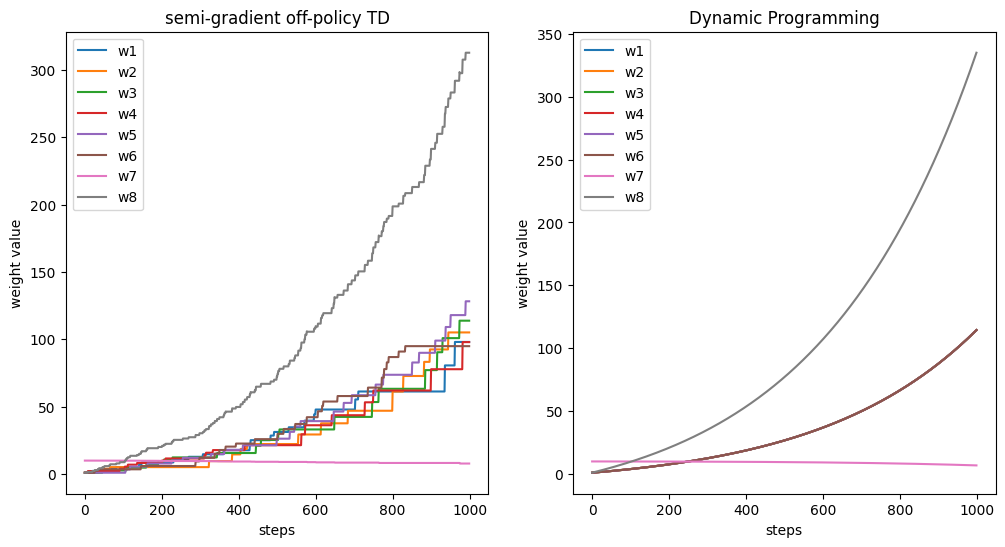

In [185]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for i in range(8):
    ax[0].plot([w[i] for w in a1.w_log], label='w'+str(i+1))
    ax[1].plot([w[i] for w in a2.w_log], label='w'+str(i+1))

ax[0].legend()
ax[0].set_xlabel('steps')
ax[0].set_ylabel('weight value')
ax[0].set_title('semi-gradient off-policy TD')

ax[1].legend()
ax[1].set_xlabel('steps')
ax[1].set_ylabel('weight value')
ax[1].set_title('Dynamic Programming')

plt.show()

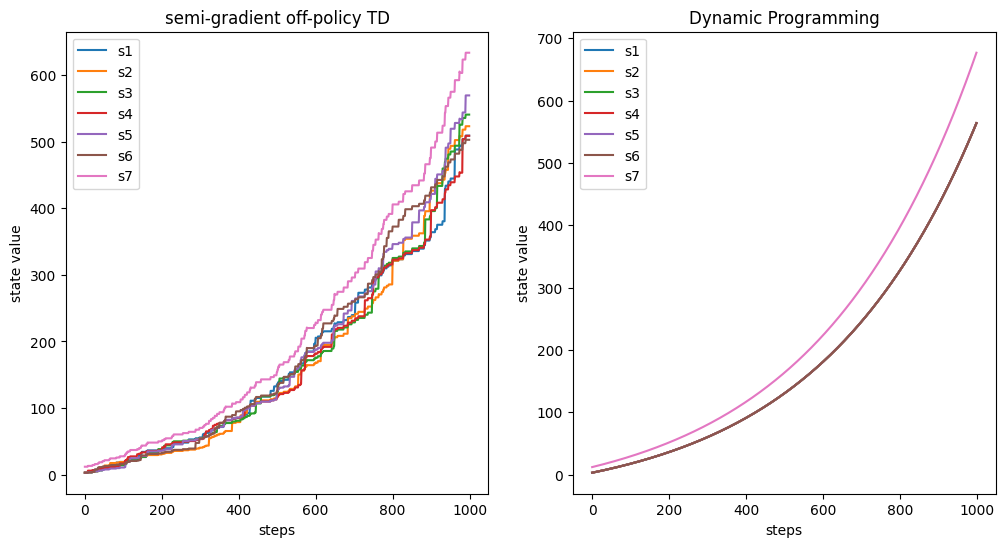

In [186]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

for i in range(7):
    ax[0].plot([s[i] for s in a1.s_log], label='s'+str(i+1))
    ax[1].plot([s[i] for s in a2.s_log], label='s'+str(i+1))

ax[0].legend()
ax[0].set_xlabel('steps')
ax[0].set_ylabel('state value')
ax[0].set_title('semi-gradient off-policy TD')

ax[1].legend()
ax[1].set_xlabel('steps')
ax[1].set_ylabel('state value')
ax[1].set_title('Dynamic Programming')

plt.show()